In [1]:
import os
import sys
import glob
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (22,8)
np.random.seed(30)
sns.set_theme(style="darkgrid")
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("../data/house-rent-data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
missing_value = df.isnull().sum()
missing_value[0:20]

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [6]:
total_cells = np.product(df.shape)
total_missing = missing_value.sum()

percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [8]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


Text(0.5, 1.0, 'Sqft_living for 0 price')

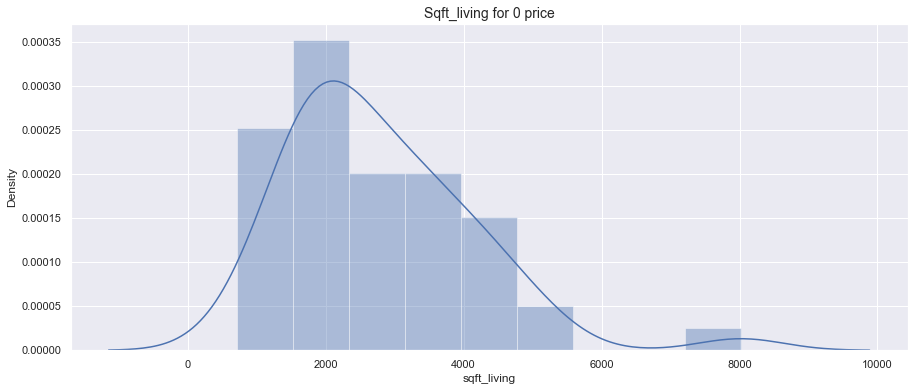

In [9]:
plt.figure(figsize=(15,6))
ax = sns.distplot(df[df["price"]==0].sqft_living)
ax.set_title('Sqft_living for 0 price', fontsize=14)

Text(0.5, 1.0, 'Bedrooms VS Price')

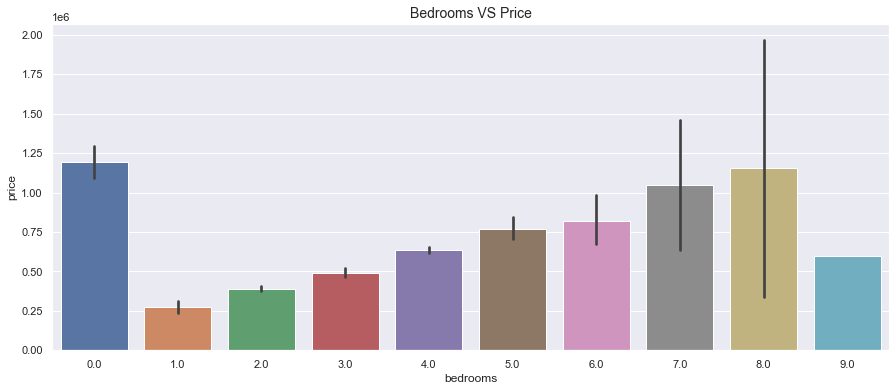

In [10]:
plt.figure(figsize=(15,6))
ax = sns.barplot(x=df['bedrooms'], y=df['price'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Bedrooms VS Price', fontsize=14)

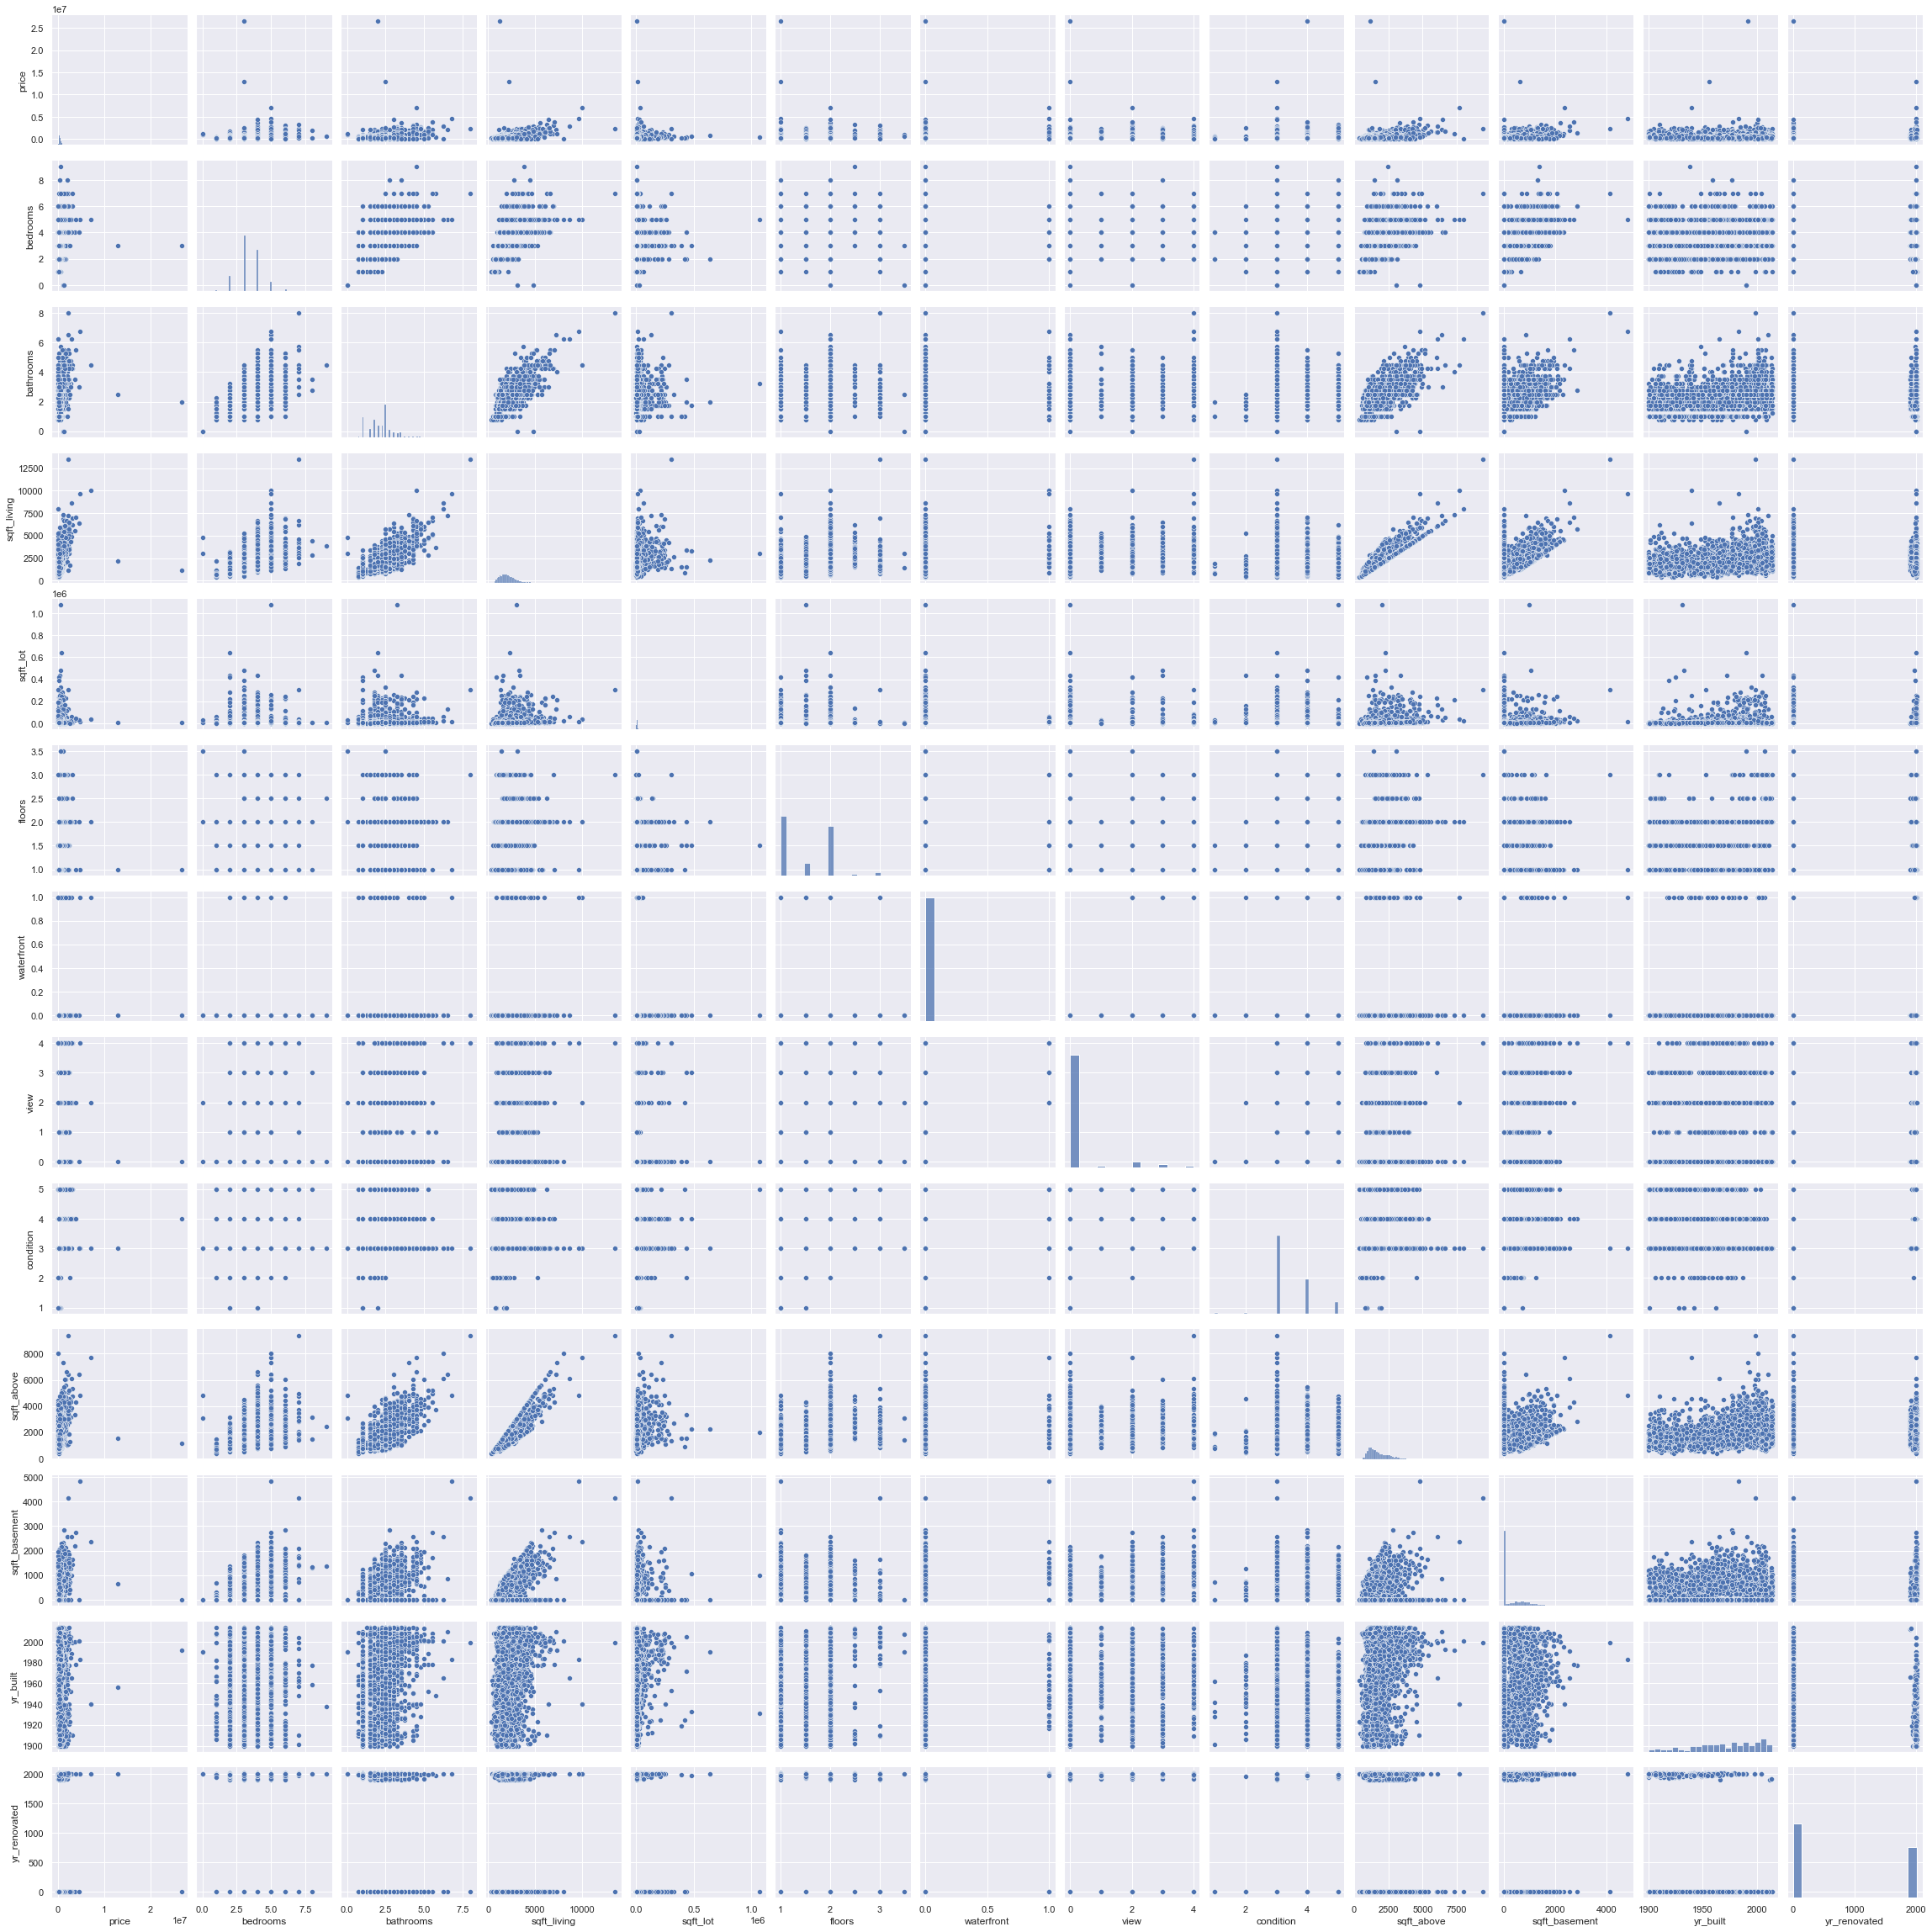

In [11]:
ax = sns.pairplot(df)

Text(0.5, 1.0, 'Sqft_living VS Price')

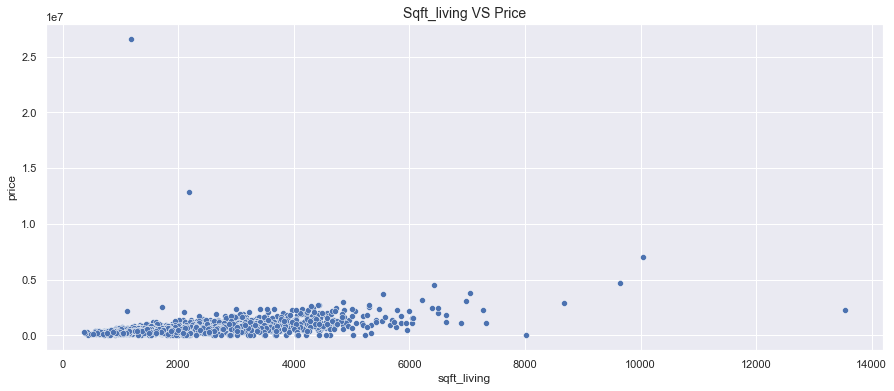

In [12]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=df, x="sqft_living", y="price")
ax.set_title('Sqft_living VS Price', fontsize=14)

Text(0.5, 1.0, 'CORRELATION MATRIX')

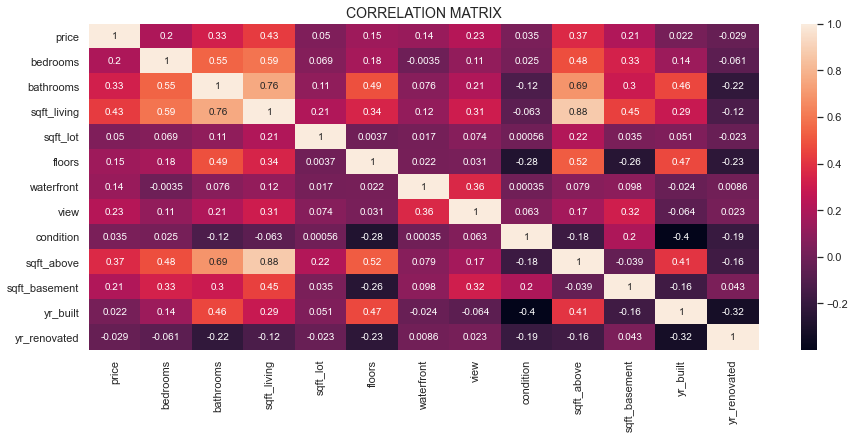

In [13]:
plt.figure(figsize=(15,6))
ax = sns.heatmap(df.corr(),annot = True)
ax.set_title('CORRELATION MATRIX', fontsize=14)

In [14]:
X = df.drop(["date",'street', 'city','statezip', 'country','price'], axis=1)
y = df[['price']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'), 
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 3

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss="mean_absolute_error", metrics=['mean_absolute_error'])

In [18]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=30, epochs=100)

Epoch 1/100
108/108 [==============================] - 0s 4ms/step - loss: 294470.5000 - mean_absolute_error: 294470.5000 - val_loss: 198451.0156 - val_mean_absolute_error: 198451.0156
Epoch 2/100
108/108 [==============================] - 0s 3ms/step - loss: 181991.0781 - mean_absolute_error: 181991.0781 - val_loss: 200124.1562 - val_mean_absolute_error: 200124.1562
Epoch 3/100
108/108 [==============================] - 0s 3ms/step - loss: 184599.6094 - mean_absolute_error: 184599.6094 - val_loss: 207604.7969 - val_mean_absolute_error: 207604.7969
Epoch 4/100
108/108 [==============================] - 0s 3ms/step - loss: 183018.2344 - mean_absolute_error: 183018.2344 - val_loss: 196593.2031 - val_mean_absolute_error: 196593.2031
Epoch 5/100
108/108 [==============================] - 0s 3ms/step - loss: 180156.7969 - mean_absolute_error: 180156.7969 - val_loss: 202395.4531 - val_mean_absolute_error: 202395.4531
Epoch 6/100
108/108 [==============================] - 0s 3ms/step - loss: 

In [19]:
model.predict(X_test)

array([[514097.47],
       [619232.7 ],
       [200950.14],
       ...,
       [978219.  ],
       [374742.56],
       [421169.72]], dtype=float32)